In [5]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

#SERVER
from server import Server
from client import Client
from client import ClientCluster
from microservice import Microservice, adjust_microservice_requirements
from networkgraph import NetworkGraph

# GRAPH
import numpy as np
import heapq
import networkx as nx
import matplotlib.pyplot as plt

#ENVIRONMENT
from microservicedeploymentenv import MicroserviceDeploymentEnv
from dqnagent import GCN, DQN_GCN, ReplayMemory, Transition, DQN_Agent

#UTILITIES
from util import visualize_deployment
from util import visualize_with_clusters
from util import list_servers_and_microservices
from util import plot_resource_utilization_for_all_servers
from util import plot_resource_utilization_for_all_servers_pct
from util import visualize_load_imbalances


False


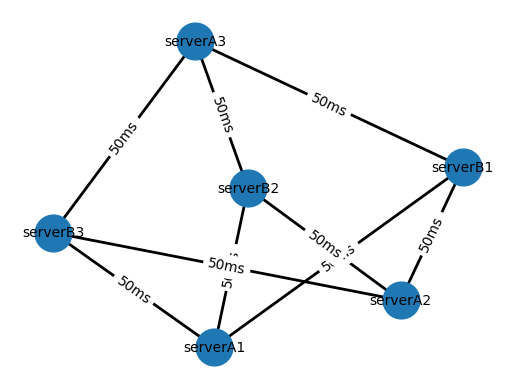

In [3]:

import torch
print(torch.cuda.is_available())
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


network_graph = NetworkGraph()

# Cluster A Servers
cluster_a_servers = ["serverA1", "serverA2", "serverA3"]
for server_id in cluster_a_servers:
    network_graph.add_server(Server(server_id, "192.168.1.x", 200, 300, 2000, 5))

# Cluster B Servers
cluster_b_servers = ["serverB1", "serverB2", "serverB3"]
for server_id in cluster_b_servers:
    network_graph.add_server(Server(server_id, "192.168.2.x", 200, 300, 2000, 5))

# Bottleneck Link - clusters with higher latency / limited bandwidth
bottleneck_link_latency = 50  # Higher latency
bottleneck_link_bandwidth = 500  # Limited bandwidth
for server_a in cluster_a_servers:
    for server_b in cluster_b_servers:
        network_graph.connect_servers(server_a, server_b, bottleneck_link_latency, bottleneck_link_bandwidth)

microservices = [
    Microservice("service1", "Auth", 50, 100, 500, 25),
    Microservice("service2", "Database", 100, 150, 1000, 30),
    Microservice("service3", "Cache", 75, 125, 750, 20),
    Microservice("service4", "Logging", 40, 90, 400, 18),
    Microservice("service5", "Payment", 60, 110, 600, 22),
    Microservice("service6", "Search", 85, 135, 850, 26),

]
client_clusters = [
    ClientCluster(region=1, microservices=["service1", "service3"], total_demand=300, latency_requirement=100),
    ClientCluster(region=2, microservices=["service2", "service4", "service5"], total_demand=500, latency_requirement=150)
]

env = MicroserviceDeploymentEnv(network_graph, microservices)
agent = DQN_Agent(num_features=3, num_actions=len(cluster_a_servers) + len(cluster_b_servers), device=device)

network_graph.visualize()

Episode 1, Total Reward: 4.488435169446912, Imbalance: 0.2919429942421741

Listing all servers and deployed microservices:
Server serverA1 (192.168.1.x): Deployed Microservices -> ['service2']
Server serverA2 (192.168.1.x): Deployed Microservices -> []
Server serverA3 (192.168.1.x): Deployed Microservices -> ['service4', 'service5']
Server serverB1 (192.168.2.x): Deployed Microservices -> []
Server serverB2 (192.168.2.x): Deployed Microservices -> []
Server serverB3 (192.168.2.x): Deployed Microservices -> ['service1', 'service3']
Episode 2, Total Reward: 6.096930055525201, Imbalance: 0.0913246518958367

Listing all servers and deployed microservices:
Server serverA1 (192.168.1.x): Deployed Microservices -> ['service1']
Server serverA2 (192.168.1.x): Deployed Microservices -> ['service4']
Server serverA3 (192.168.1.x): Deployed Microservices -> ['service5']
Server serverB1 (192.168.2.x): Deployed Microservices -> ['service2']
Server serverB2 (192.168.2.x): Deployed Microservices -> ['s

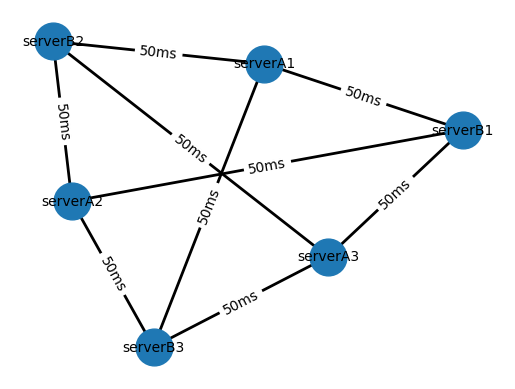

[0.2919429942421741, 0.0913246518958367, 0.32680719351211834, 0.3702899831629547, 0.2985209626307052, 0.31177500951730275, 0.3420605829138273, 0.32316717358688085, 0.24956022941455777, 0.23499799374278438, 0.09132465189583668, 0.09132465189583668, 0.09132465189583668, 0.27198535570273413, 0.23499799374278438, 0.0913246518958367, 0.23416536902511406, 0.19747758471122365, 0.234165369025114, 0.27095157677913423, 0.09132465189583668, 0.19675722811187094, 0.09132465189583668, 0.09132465189583668, 0.2690190504828161, 0.17499412438747866, 0.33357032661305386, 0.09132465189583668, 0.09132465189583668, 0.2115775328594721, 0.09132465189583668, 0.09132465189583668, 0.19747758471122365, 0.26834456919376093, 0.2709515767791343, 0.09132465189583668, 0.09132465189583668, 0.24956022941455777, 0.09132465189583668, 0.20577363461606138, 0.09132465189583668, 0.2115775328594721, 0.0913246518958367, 0.09132465189583668, 0.09132465189583668, 0.09132465189583668, 0.09132465189583668, 0.09132465189583668, 0.09

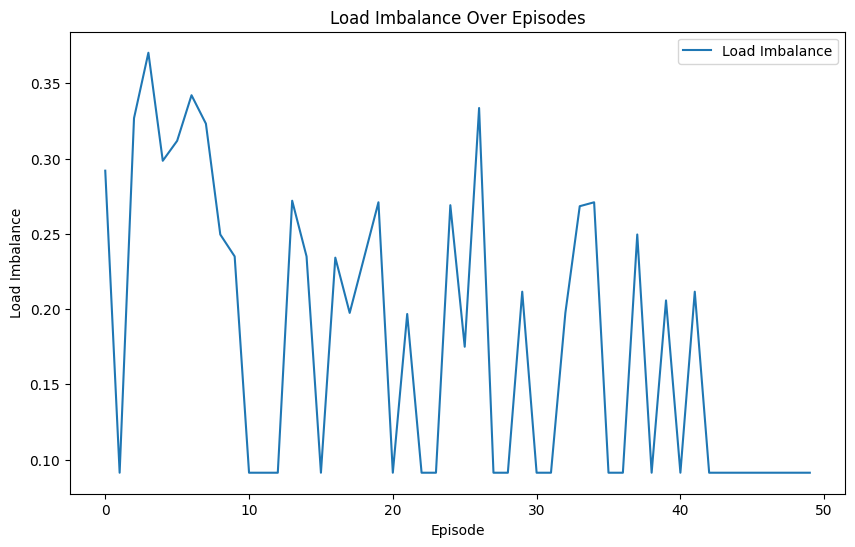


Listing all servers and deployed microservices:
Server serverA1 (192.168.1.x): Deployed Microservices -> ['service1']
Server serverA2 (192.168.1.x): Deployed Microservices -> ['service3']
Server serverA3 (192.168.1.x): Deployed Microservices -> ['service5']
Server serverB1 (192.168.2.x): Deployed Microservices -> ['service2']
Server serverB2 (192.168.2.x): Deployed Microservices -> ['service4']
Server serverB3 (192.168.2.x): Deployed Microservices -> ['service6']


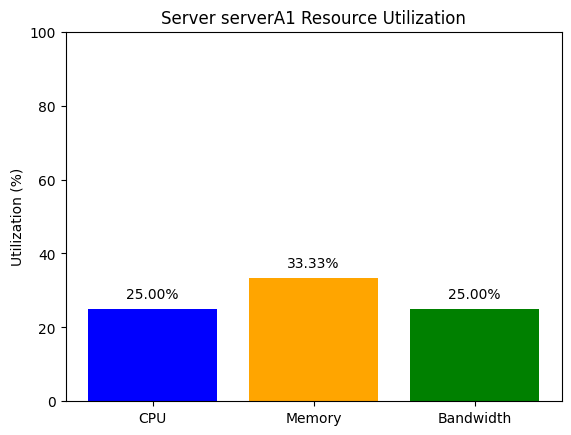

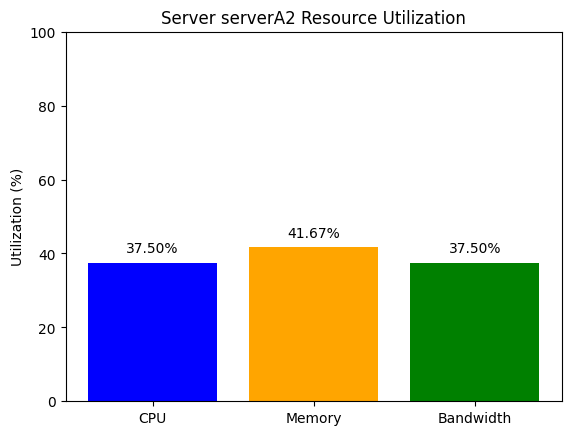

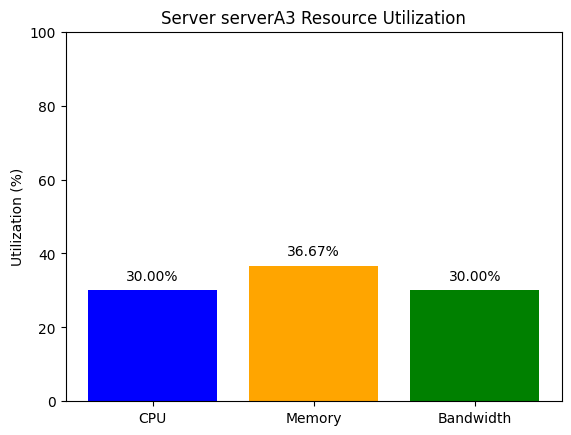

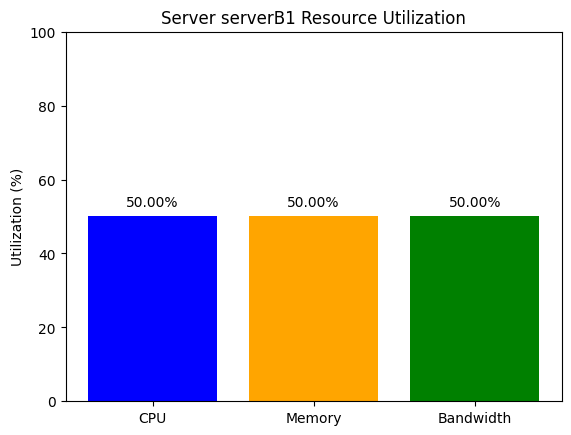

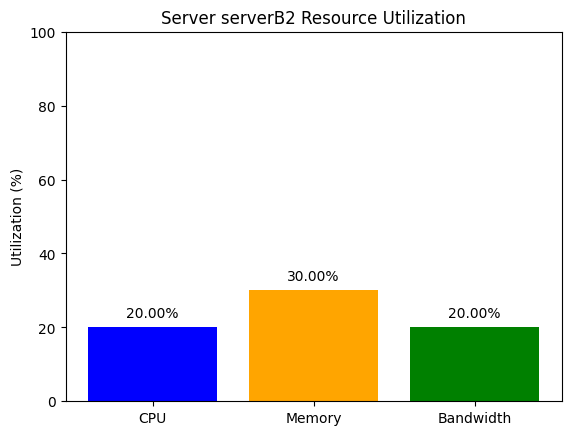

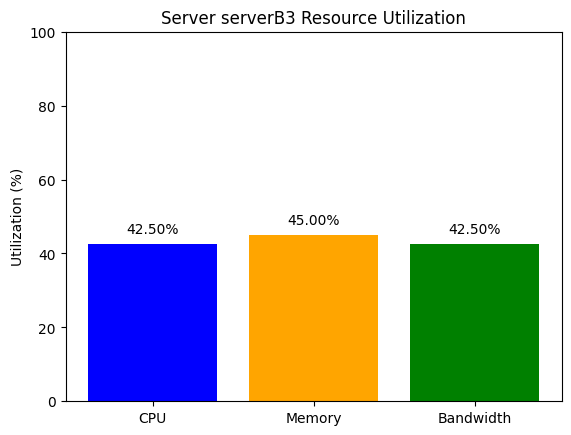

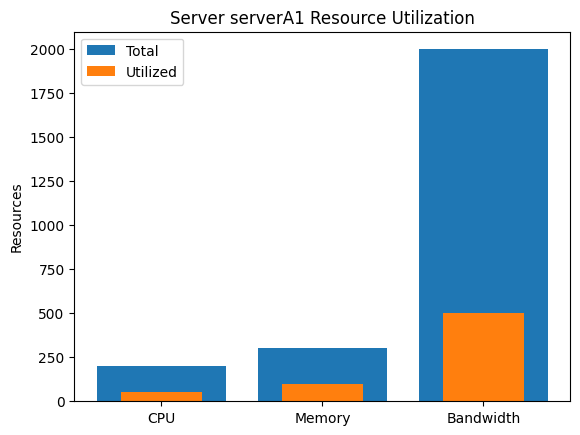

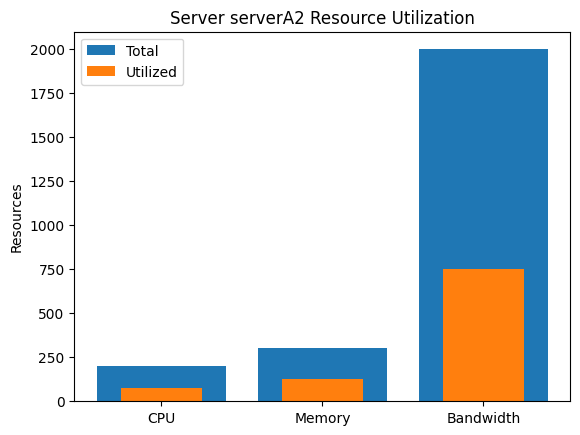

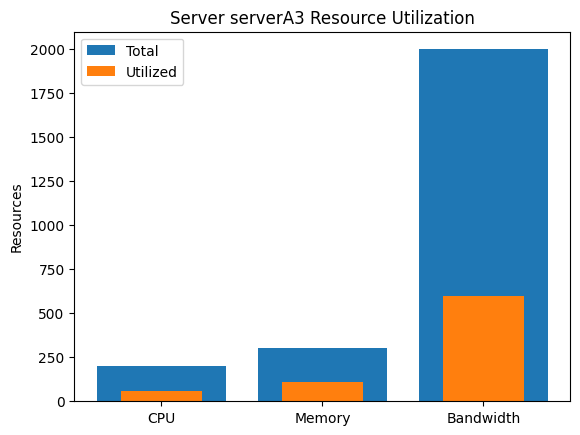

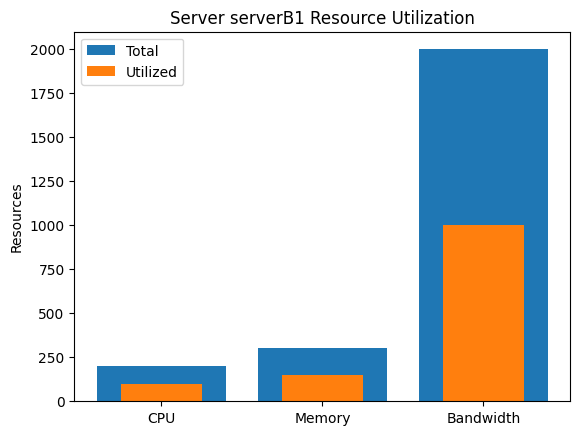

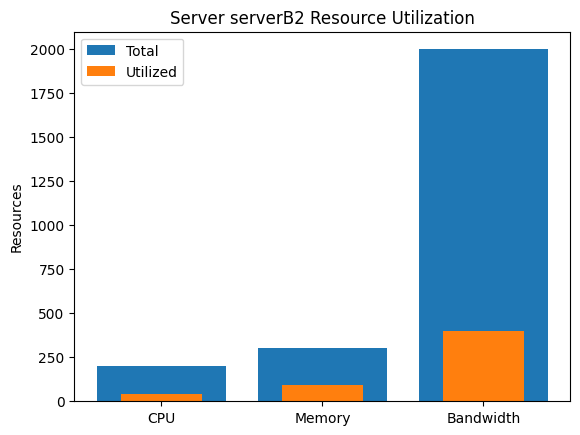

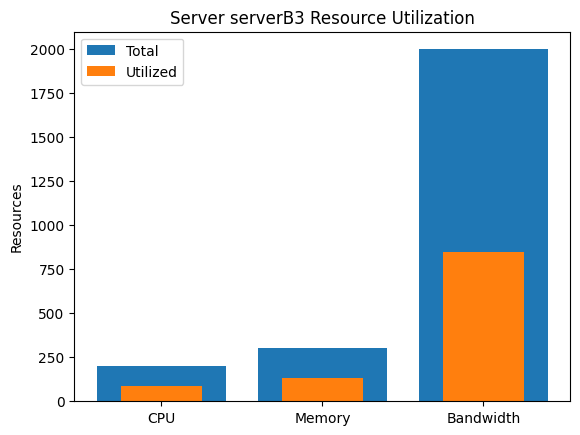

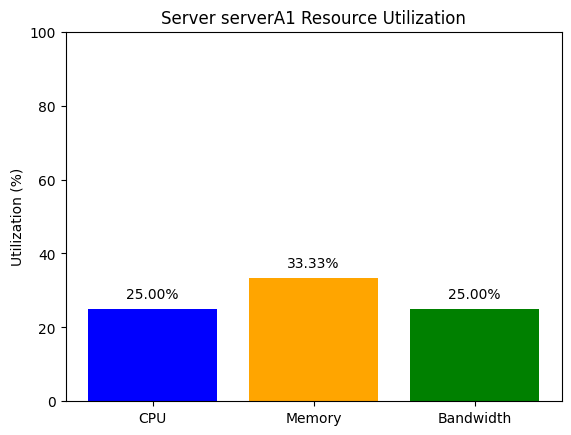

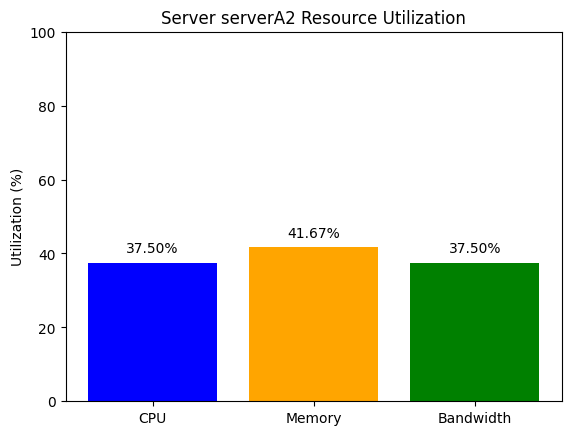

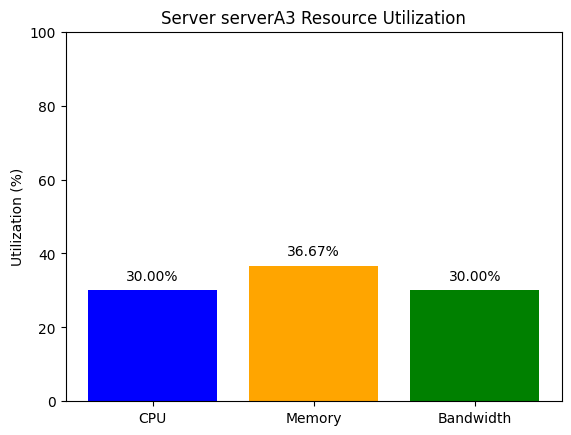

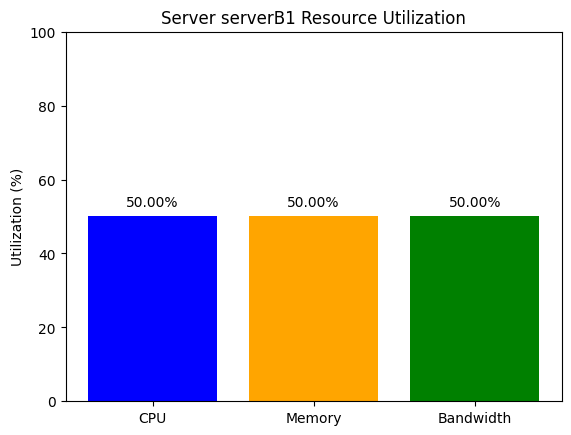

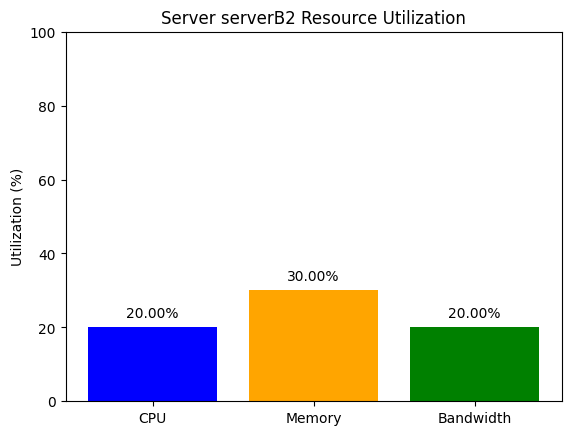

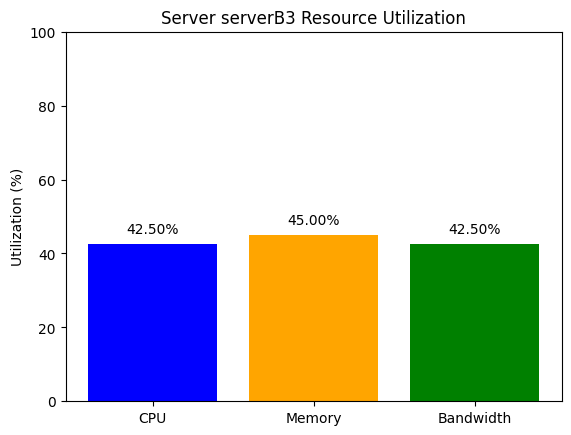


Listing all servers and deployed microservices:
Server serverA1 (192.168.1.x): Deployed Microservices -> ['service1']
Server serverA2 (192.168.1.x): Deployed Microservices -> ['service3']
Server serverA3 (192.168.1.x): Deployed Microservices -> ['service5']
Server serverB1 (192.168.2.x): Deployed Microservices -> ['service2']
Server serverB2 (192.168.2.x): Deployed Microservices -> ['service4']
Server serverB3 (192.168.2.x): Deployed Microservices -> ['service6']


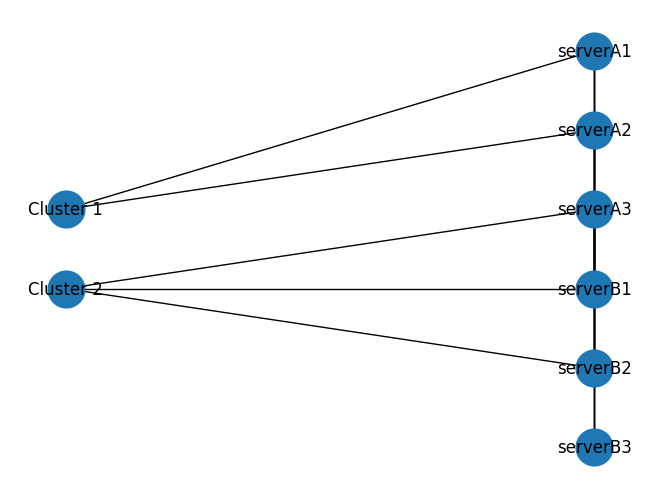

In [4]:
load_imbalances = []  # List to store load imbalance of each episode


num_episodes = 50  # Number of episodes to run for testing
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.select_action(state)
        action_scalar = action.squeeze().item()
        next_state, reward, done = env.execute_action(action_scalar)
        total_reward += reward

        agent.memory.push(state, action, next_state, torch.tensor([reward], dtype=torch.float), done)
        state = next_state
        agent.optimize_model(batch_size=32)

    if episode % 10 == 0:
        agent.update_target_net()

    load_imbalance = network_graph.calculate_load_imbalance()
    avg_imbalance = (load_imbalance['cpu_std'] + load_imbalance['memory_std'] + load_imbalance['bandwidth_std']) / 3        

    load_imbalances.append(avg_imbalance)
    print(f'Episode {episode+1}, Total Reward: {total_reward}, Imbalance: {avg_imbalance}')
    list_servers_and_microservices(network_graph)


        
network_graph.visualize()
visualize_load_imbalances(load_imbalances)
list_servers_and_microservices(network_graph)
plot_resource_utilization_for_all_servers_pct(network_graph)
plot_resource_utilization_for_all_servers(network_graph)
plot_resource_utilization_for_all_servers_pct(network_graph)

# List servers and their deployed microservices in the new environment
list_servers_and_microservices(network_graph)
# Assuming 'agent.policy_net' is your model
visualize_with_clusters(network_graph, client_clusters)
torch.save(agent.policy_net.state_dict(), 'dqn_model.pth')


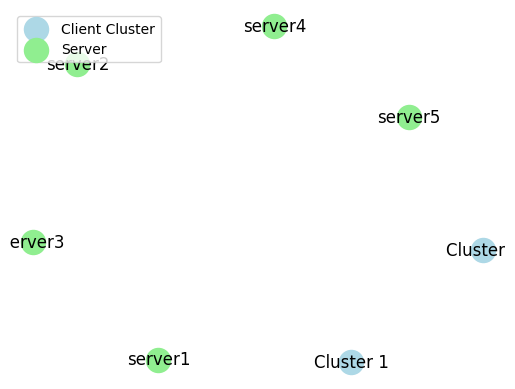

In [94]:
visualize_deployment(client_clusters, servers, microservices)


In [ ]:
""" # CLUSTERS TEST
servers = [
    Server("server1", "10.0.1.1", 200, 400, 1000, 1),
    Server("server2", "10.0.2.1", 250, 450, 1100, 2),
    Server("server3", "10.0.3.1", 300, 500, 1200, 3),
    Server("server4", "10.0.4.1", 350, 550, 1300, 4),
    Server("server5", "10.0.5.1", 400, 600, 1400, 5)
]

# Generate clients (50 per microservice, 25 from each of 2 regions)
clients = []
regions = [1, 2]  # Two regions
for i in range(1, 251):  # 250 clients in total
    region = regions[(i-1) % len(regions)]
    microservices = [f"service{(i-1) % 5 + 1}"]  # Cycle through microservices
    demand = 100  # Hypothetical demand value
    clients.append(Client(f"client{i}", region, microservices, demand))


# Aggregate client demands by region and microservice
client_clusters = {}
for client in clients:
    key = (client.region, tuple(client.microservices))
    if key not in client_clusters:
        client_clusters[key] = ClientCluster(client.region, client.microservices, 0, 150)
    client_clusters[key].total_demand += client.demand

client_clusters = list(client_clusters.values())

microservices = [
    Microservice("service1", "Auth", 0, 0, 0, 0),
    Microservice("service2", "Data", 0, 0, 0, 0),
    Microservice("service3", "Payment", 0, 0, 0, 0),
    Microservice("service4", "Search", 0, 0, 0, 0),
    Microservice("service5", "User", 0, 0, 0, 0)
]

for microservice in microservices:
    for cluster in client_clusters:
        if microservice.service_id in cluster.microservices:
            microservice.cpu_requirement += cluster.total_demand // 10
            microservice.memory_requirement += (cluster.total_demand // 10) * 2
            microservice.bandwidth_requirement += (cluster.total_demand // 10) * 5
            # Assuming all clusters have the same latency requirement for simplicity
            microservice.latency_threshold = cluster.latency_requirement

import networkx as nx
import matplotlib.pyplot as plt
"""


In [ ]:
# NO CLUSTERS 
""""
import torch
print(torch.cuda.is_available())
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


network_graph = NetworkGraph()

# Cluster A Servers
cluster_a_servers = ["serverA1", "serverA2", "serverA3"]
for server_id in cluster_a_servers:
    network_graph.add_server(Server(server_id, "192.168.1.x", 200, 300, 2000, 5))

# Cluster B Servers
cluster_b_servers = ["serverB1", "serverB2", "serverB3"]
for server_id in cluster_b_servers:
    network_graph.add_server(Server(server_id, "192.168.2.x", 200, 300, 2000, 5))

# Bottleneck Link - clusters with higher latency / limited bandwidth
bottleneck_link_latency = 50  # Higher latency
bottleneck_link_bandwidth = 500  # Limited bandwidth
for server_a in cluster_a_servers:
    for server_b in cluster_b_servers:
        network_graph.connect_servers(server_a, server_b, bottleneck_link_latency, bottleneck_link_bandwidth)

microservices = [
    Microservice("service1", "Auth", 50, 100, 500, 25),
    Microservice("service2", "Database", 100, 150, 1000, 30),
    Microservice("service3", "Cache", 75, 125, 750, 20),
    Microservice("service4", "Logging", 40, 90, 400, 18),
    Microservice("service5", "Payment", 60, 110, 600, 22),
    Microservice("service6", "Search", 85, 135, 850, 26),

]

env = MicroserviceDeploymentEnv(network_graph, microservices)
agent = DQN_Agent(num_features=3, num_actions=len(cluster_a_servers) + len(cluster_b_servers), device=device)

network_graph.visualize()
"""
